In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.shape

(768, 9)

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# not possible for min to be 0 for Glucose, BP, no missing values does not mean data is correct

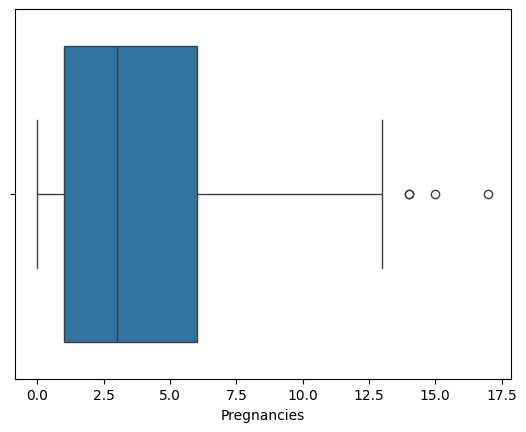

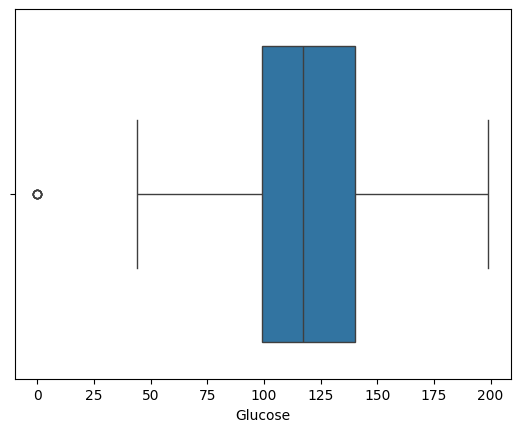

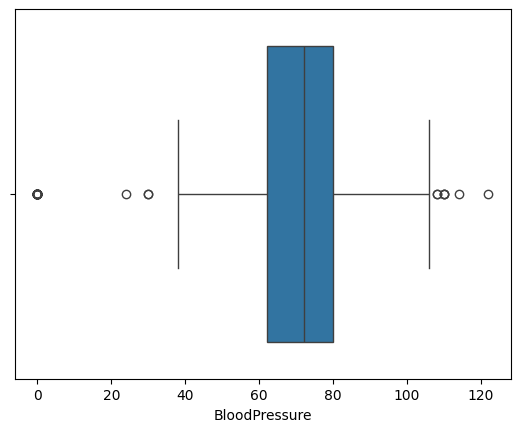

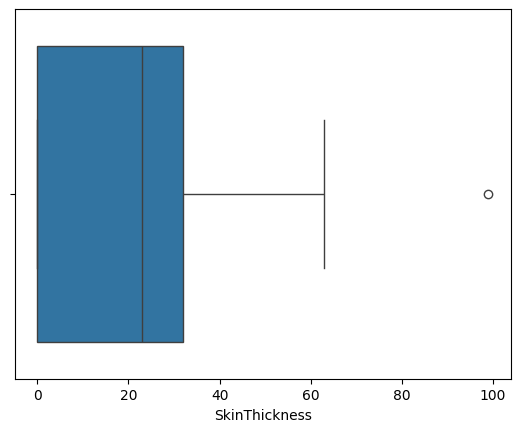

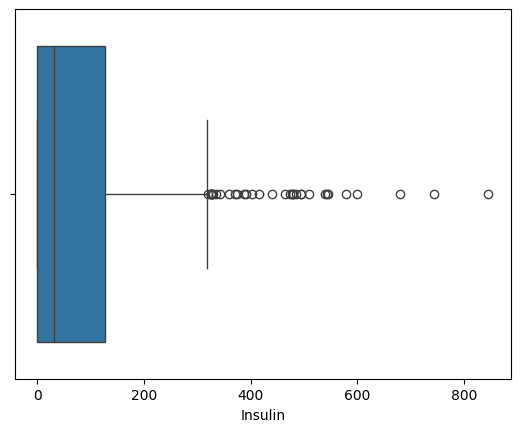

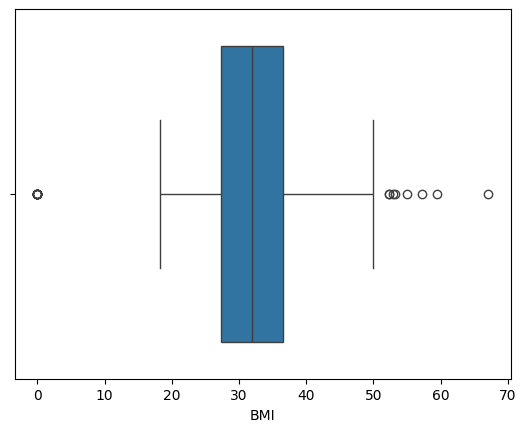

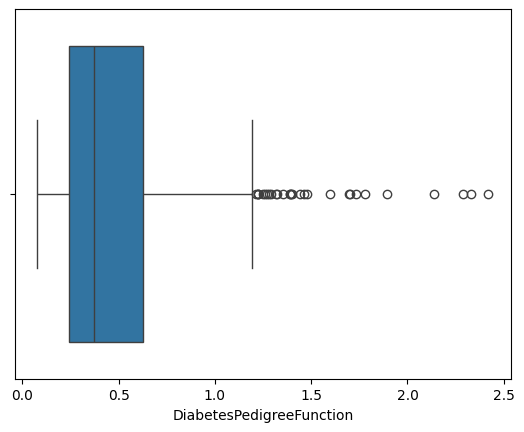

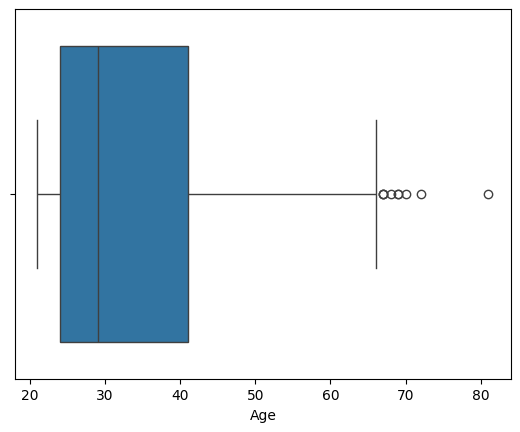

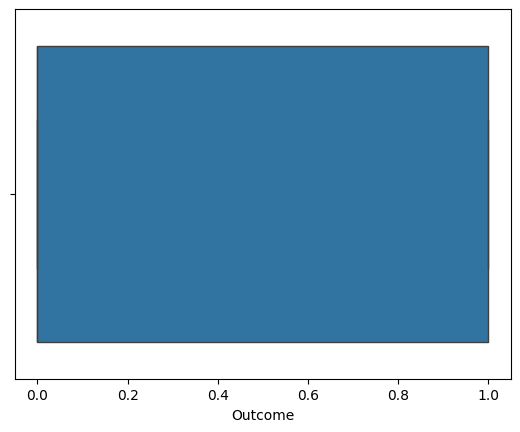

In [9]:
for i in data.columns:
  sns.boxplot(x=data[i])
  plt.show()

In [10]:
# Outcome column
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

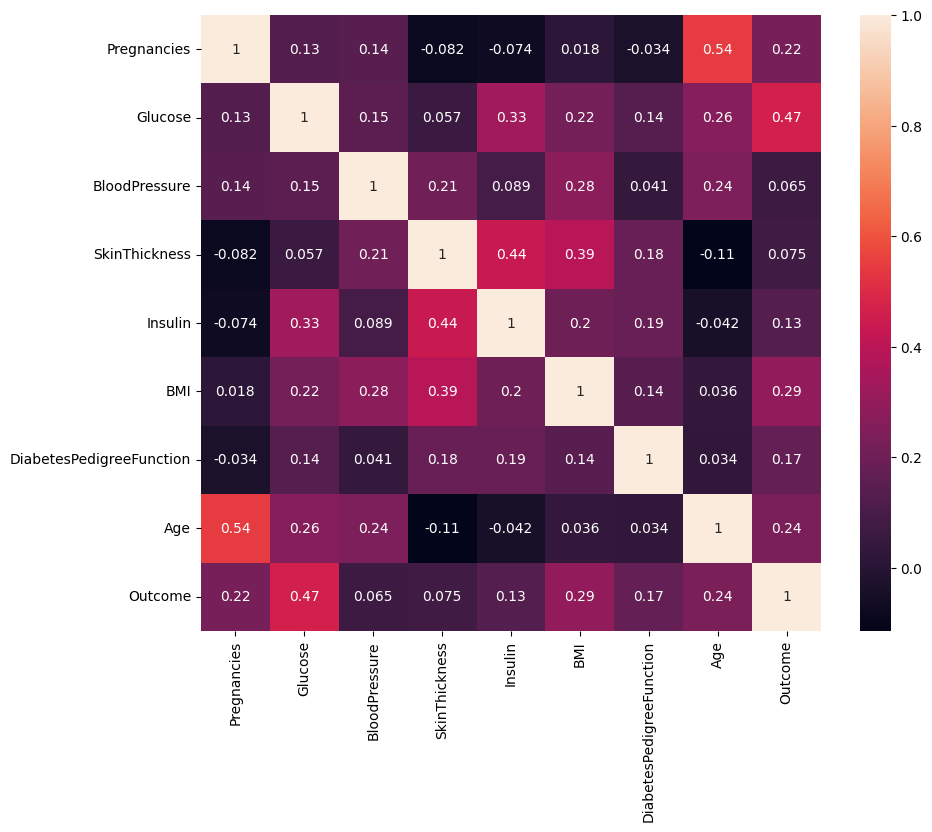

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [12]:
# Extract Indep & dep var
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
# create train set & test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [15]:
# Apply standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
# Apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
#default is gini, max depth none

In [17]:
#for learning purpose test for max depth
train_scores, test_scores = list(), list()

In [18]:
values = [i for i in range(1,21)]

In [19]:
# Accuracy score
from sklearn.metrics import accuracy_score

In [20]:
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.743, test: 0.760
>2, train: 0.743, test: 0.760
>3, train: 0.748, test: 0.750
>4, train: 0.786, test: 0.740
>5, train: 0.825, test: 0.750
>6, train: 0.840, test: 0.745
>7, train: 0.884, test: 0.682
>8, train: 0.918, test: 0.688
>9, train: 0.938, test: 0.698
>10, train: 0.969, test: 0.698
>11, train: 0.979, test: 0.703
>12, train: 0.991, test: 0.688
>13, train: 0.998, test: 0.698
>14, train: 0.998, test: 0.708
>15, train: 1.000, test: 0.698
>16, train: 1.000, test: 0.698
>17, train: 1.000, test: 0.703
>18, train: 1.000, test: 0.682
>19, train: 1.000, test: 0.703
>20, train: 1.000, test: 0.672


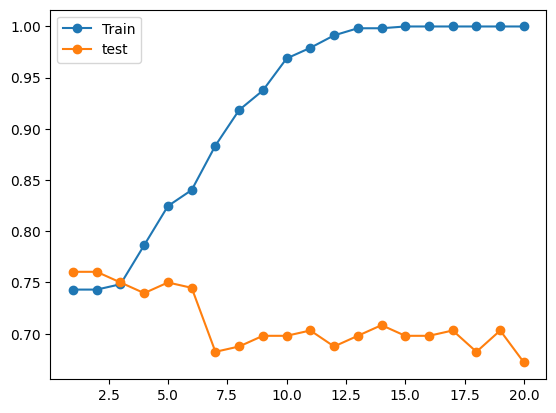

In [21]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='test')
plt.legend()
plt.show()

In [22]:
#samples are rows, records

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [24]:
# use a full grid over all parameters
param_grid = {"max_depth": [3,4,5,6],
              "max_features": [1, 3,5],
              "min_samples_split": [2, 3,5, 10],
              "criterion": ["gini", "entropy"], "min_samples_leaf":[1,2,3,4]}

In [25]:
# run grid search
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [26]:
# Apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt3=DecisionTreeClassifier(criterion='gini',max_depth=4,max_features=5,min_samples_leaf=4,min_samples_split=3)


In [27]:
# training
dt3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=5, min_samples_leaf=4,
                       min_samples_split=3)

In [28]:
y_pred=dt3.predict(X_test)

In [29]:
# Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7083333333333334


In [30]:
dt3.score(X_train,y_train)

0.8003472222222222

In [31]:
dt3.score(X_test,y_test)

0.7083333333333334

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       132
           1       0.53      0.52      0.53        60

    accuracy                           0.71       192
   macro avg       0.66      0.66      0.66       192
weighted avg       0.71      0.71      0.71       192



In [33]:
#feature importance for model 2
dt3.feature_importances_

array([0.07287102, 0.49202015, 0.        , 0.0432284 , 0.0303065 ,
       0.24220526, 0.05016703, 0.06920163])

In [34]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [35]:
dict1=dict(zip(X.columns, dt3.feature_importances_))
dict1

{'Pregnancies': 0.0728710233156619,
 'Glucose': 0.4920201481124141,
 'BloodPressure': 0.0,
 'SkinThickness': 0.04322840363931276,
 'Insulin': 0.030306503828715067,
 'BMI': 0.24220526246337504,
 'DiabetesPedigreeFunction': 0.050167029727023756,
 'Age': 0.06920162891349738}

In [36]:
print(dict(zip(X.columns, dt3.feature_importances_)))

{'Pregnancies': 0.0728710233156619, 'Glucose': 0.4920201481124141, 'BloodPressure': 0.0, 'SkinThickness': 0.04322840363931276, 'Insulin': 0.030306503828715067, 'BMI': 0.24220526246337504, 'DiabetesPedigreeFunction': 0.050167029727023756, 'Age': 0.06920162891349738}


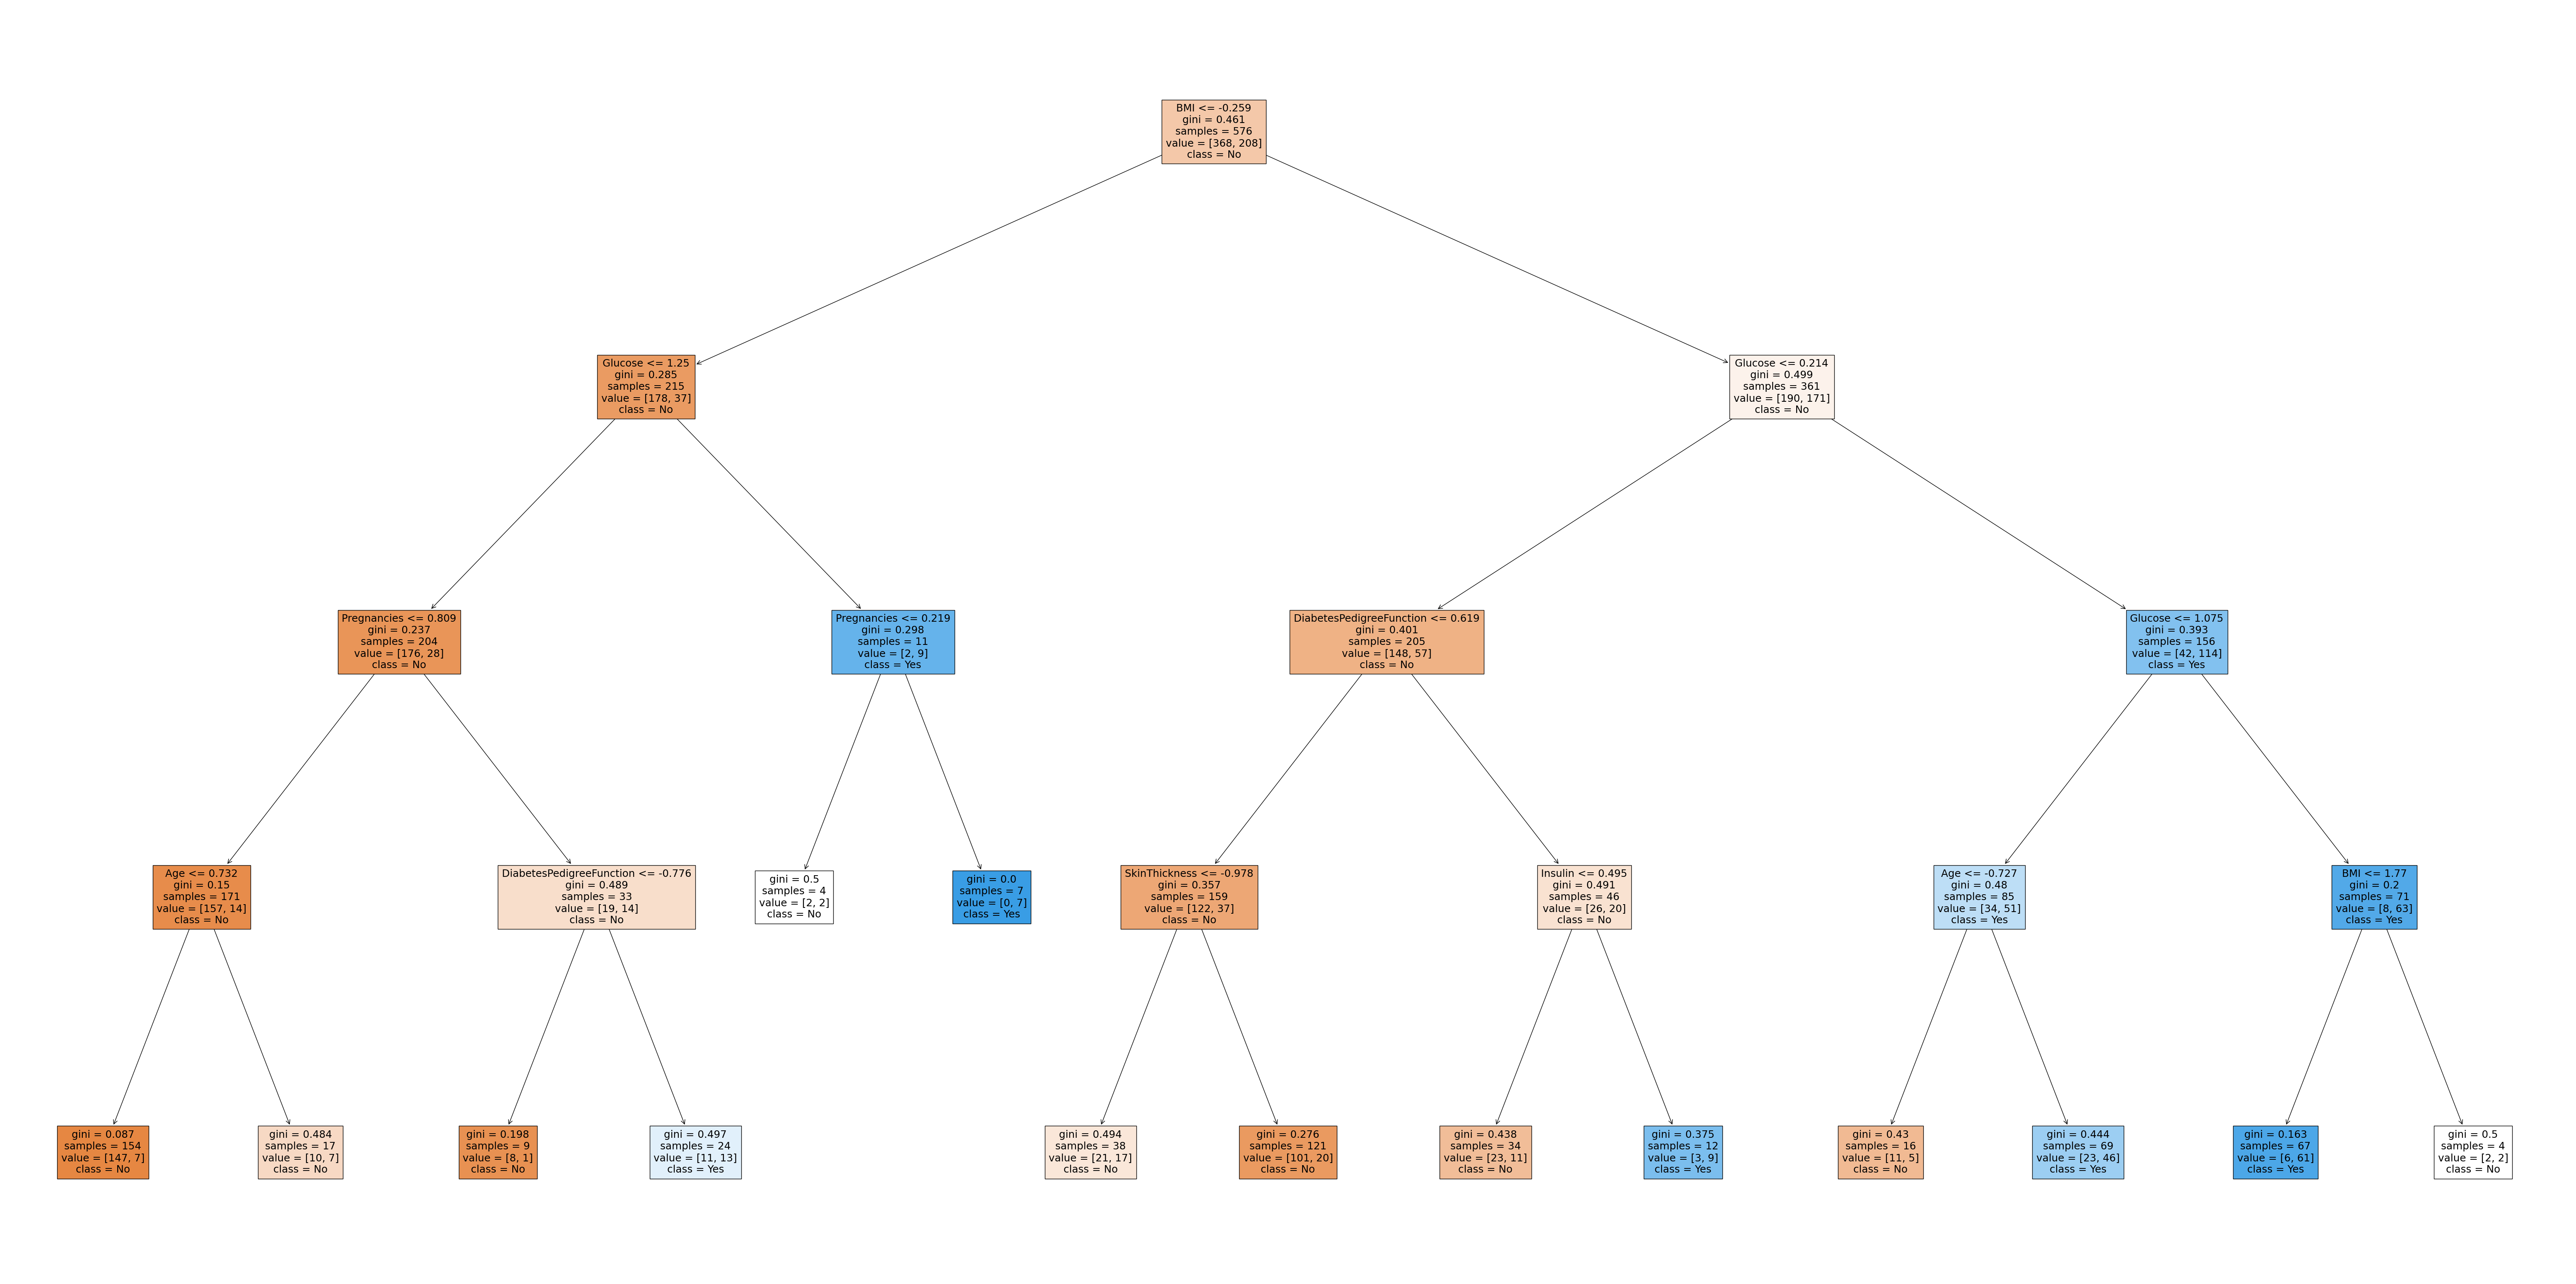

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(80,40))
plot_tree(dt3,class_names=['No','Yes'],feature_names=X.columns.values.tolist(), filled=True)
plt.show()

In [38]:
import pickle
model = 'final_model.pkl' #name of the pickle file
pickle.dump(dt3, open(model, 'wb')) #saving the dt2 model using dump function

In [39]:
#loading the saved model
load_model = pickle.load(open(model,'rb'))

In [57]:
#Apply Random Forest

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

In [58]:
random_forest.fit(X_train,y_train)


RandomForestClassifier()

In [59]:
y_pred = random_forest.predict(X_test)

In [60]:
# Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7552083333333334


In [50]:
random_forest.score(X_train,y_train)

1.0

In [51]:
#grid search is exhaustive and will take more time
#random search will work on random combinations of data

In [56]:
# Apply grid search cv
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

param_grid={'n_estimators':[100,300],'max_depth':[2,3,4],'max_features':[1,3,5],'min_samples_split':[2,3,5],
            "criterion":['gini','entropy'],'min_samples_leaf':[1,2,3]}

random_search=RandomizedSearchCV(random_forest,param_distributions=param_grid,cv=5,verbose=1,return_train_score=True)
random_search.fit(X_train,y_train)
random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': 4,
 'criterion': 'entropy'}

In [54]:
#n_iter is the number of randomizations

In [ ]:
# run grid search

grid_search2 = GridSearchCV(random_forest, param_grid=param_grid, cv=5, verbose=1)
grid_search2.fit(X_train, y_train)
grid_search2.best_params_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [61]:
# build a classifier with best of Random search
rf_grid_search = RandomForestClassifier(n_estimators=300,criterion = 'entropy',  max_features =3, min_samples_split = 2, min_samples_leaf=2, max_depth=4)

#Train the model using the training sets with best of Grid search
rf_grid_search.fit(X_train, y_train)

#Predict the response for test dataset with best of Grid search
y_pred = rf_grid_search.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",accuracy_score(y_test, y_pred))

print(rf_grid_search.score(X_train,y_train))


Test Accuracy: 0.78125
0.8229166666666666


In [ ]:
# build a classifier with best of Random search
rf_grid_search = RandomForestClassifier(n_estimators=300,criterion = 'entropy',  max_features =3, min_samples_split = 2, min_samples_leaf=2, max_depth=4)

#Train the model using the training sets with best of Grid search
rf_grid_search.fit(X_train, y_train)

#Predict the response for test dataset with best of Grid search
y_pred = rf_grid_search.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",accuracy_score(y_test, y_pred))

print(rf_grid_search.score(X_train,y_train))
